In [2]:
import cv2
from matplotlib import pyplot as plt
import os
import numpy as np
# import random

# Importing the function files

In [3]:
from final_main import *

We develop a function called `pathlist` to compile a list of files from a directory path.

In [4]:
def pathList(path):
    files = [i for i in os.listdir(path) if i.lower().endswith(('png', 'jpg', 'jpeg'))]
    return [os.path.join(path, file) for file in files]

From `final_main.py` file, call `segmentation` function by passing the leaf images.

In [5]:
folder_path = pathList("original/")
segmented_list = segmentation(folder_path)

In [6]:
segmented = pathList("segmented/")
dictionaries = findContour(segmented)

In [2]:
def randomized_img(path, num_images=10):
    files = [i for i in os.listdir(path) if i.lower().endswith(('png', 'jpg', 'jpeg'))]
    selected = random.sample(files, min(num_images, len(files)))
    return [os.path.join(path, file) for file in selected]

def display_images_grid(image_paths, grid_size=(2, 5)):
    fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(12, 6))
    axes = axes.flatten()
    
    for ax, img_path in zip(axes, image_paths):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
        ax.imshow(img)
        ax.set_title(os.path.basename(img_path))
        ax.axis('off')
    
    for ax in axes[len(image_paths):]:
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# Dataset Preview

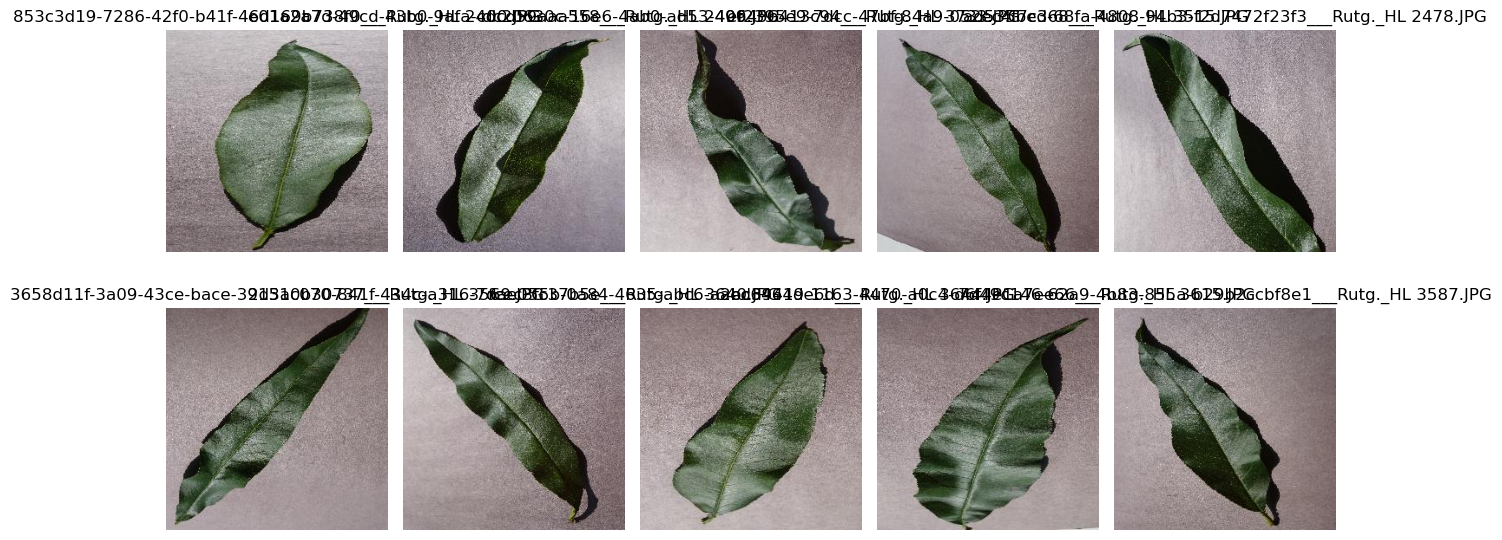

In [ ]:
folder_path = "raw/color/Peach___healthy"
image_paths = randomized_img(folder_path, num_images=10)
display_images_grid(image_paths)

# Image Segmentation

In [4]:
def display_segmented(image_paths, grid_size=(2, 5)):
    fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(12, 6))
    axes = axes.flatten()
    path_list = []
    
    for ax, img_path in zip(axes, image_paths):
        image = cv2.imread(img_path)                                # open the image
        image_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)           # convert to RGB 
        image_hsv = cv2.cvtColor(image_rgb,cv2.COLOR_RGB2HSV)       # convert to HSV
        mask = cv2.inRange(image_hsv, (20, 0, 0), (80, 255, 255))   # choose the HSV range to make the mask
        kernel = np.ones((10, 10),np.uint8)                         # setup the kernel for the morphology
        mask_morph = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
        mask_3ch = cv2.cvtColor(mask_morph, cv2.COLOR_GRAY2BGR)     # convert the mask to 3 channels
        foreground = cv2.bitwise_and(image_rgb, mask_3ch)           # remove the background
        image_bgr = cv2.cvtColor(foreground,cv2.COLOR_RGB2BGR)

        # Save the image to a folder
        filename = os.path.basename(img_path)
        save_path = os.path.join("segmented/", filename)
        cv2.imwrite(save_path, image_bgr)
        path_list.append(save_path)

        ax.imshow(foreground)                                       # show the images with removed background
        ax.set_title(os.path.basename(img_path))
        ax.axis('off')

    print(img_path)
    
    for ax in axes[len(image_paths):]:
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    return path_list

raw/color/Peach___healthy\7d49c146-62a9-4b83-855a-b29b2ccbf8e1___Rutg._HL 3587.JPG


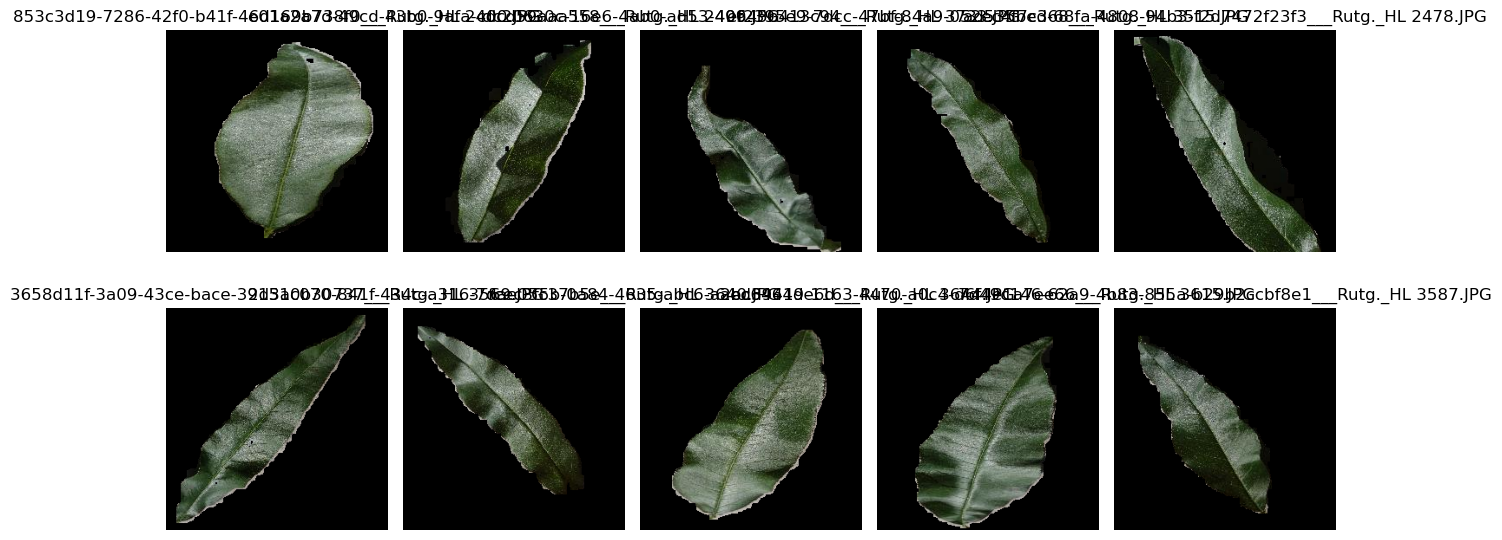

In [7]:
# Display
segmented_list = display_segmented(image_paths)

# Color Intensity Mean of Healthy Leafs

In [54]:
image01 = cv2.imread(segmented_list[0])
image01_hsv = cv2.cvtColor(image01, cv2.COLOR_BGR2HSV)
mask01 = cv2.inRange(image01, (0, 0, 10), (180, 255, 255))
mean01 = cv2.mean(image01, mask01)[0:3]                     # HSV mean  
mean01

(93.9367931061014, 114.52196660767869, 101.5767100100023)

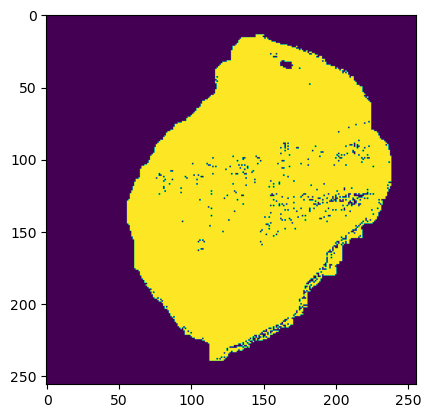

In [55]:
plt.imshow(mask01)

In [64]:
segmented_list[0]

'segmented/853c3d19-7286-42f0-b41f-46d169b738f0___Rutg._HL 2400.JPG'

In [88]:
img = cv2.imread('raw/segmented_sorted/ea208642-5ffd-4608-9ebf-da99390297f1___Rutg._Bact.S 1683_final_masked.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# img = cv2.medianBlur(img,5)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
 
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,5,
                            param1=80,param2=50,minRadius=0,maxRadius=50)
 
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

plt.imshow(cimg)


TypeError: loop of ufunc does not support argument 0 of type NoneType which has no callable rint method

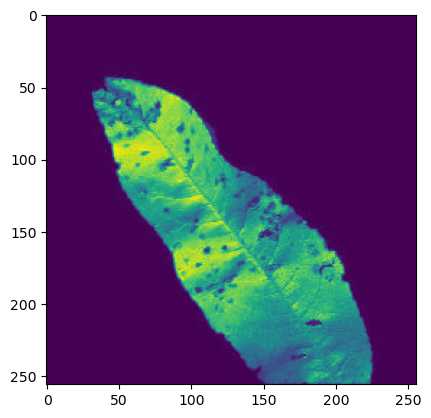

In [87]:
plt.imshow(img)

# Edge Detection

In [ ]:
def display_edge(image_paths, grid_size=(2, 5)):
    fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(12, 6))
    axes = axes.flatten()
    
    for ax, img_path in zip(axes, image_paths):
        image = cv2.imread(img_path)                                # open the image
        image_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)         # convert to greyscale 
        image_blur = cv2.GaussianBlur(image_gray, (13,13), 0)         # blur the image
        # sobelx = cv2.Sobel(src=image_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)
        # sobely = cv2.Sobel(src=image_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)
        # sobelxy = cv2.Sobel(src=image_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)
        # sobel = sobelx+sobely+sobelxy
        canny = cv2.Canny(image=image_blur, threshold1=100, threshold2=150)

        ax.imshow(canny, cmap='grey')                                       # show the images with removed background
        ax.set_title(os.path.basename(img_path))
        ax.axis('off')
    
    for ax in axes[len(image_paths):]:
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

In [1]:
test = {}
test['Pentol']=8000

In [2]:
test

{'Pentol': 8000}